In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances


In [52]:
def evaluate_clustering(features, max_k, labels=None):
    internal_indices = {
        'Davies-Bouldin index': [],
        'Dunn index': [],
        'Calinski-Harabasz index': [],
    }
    external_indices = {
        'Adjusted Rand Index': [],
    }
    
    for k in range(2, max_k+1):
        # perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
        labels_pred = kmeans.labels_

        # compute internal clustering validation indices
        internal_indices['Davies-Bouldin index'].append(davies_bouldin_score(features, labels_pred))
        internal_indices['Dunn index'].append(dunn_index(features, labels_pred))
        internal_indices['Calinski-Harabasz index'].append(calinski_harabasz_score(features, labels_pred))

        # compute external clustering validation indices (if ground truth labels are available)
        if labels is not None:
            external_indices['Adjusted Rand Index'].append(adjusted_rand_score(labels, labels_pred))

    # save the results
     
    results_internal = pd.DataFrame(internal_indices)
    results_external = pd.DataFrame(external_indices)

    # save results to CSV file
    results_internal.to_csv('results_internal.csv', index=False)
    results_external.to_csv('results_external.csv', index=False)
            
    return internal_indices, external_indices


In [53]:
def plot_k_selection(internal_indices, external_indices=None):
    fig, ax = plt.subplots(len(internal_indices), 1, figsize=(8, 12))
    plt.subplots_adjust(hspace=0.5)

    for i, (index, values) in enumerate(internal_indices.items()):
        ax[i].plot(range(2, len(values)+2), values)
        ax[i].set_xlabel('Number of clusters (K)')
        ax[i].set_ylabel(index)
        ax[i].set_title(f'{index} vs K')

        if external_indices is not None:
            ax2 = ax[i].twinx()
            ax2.plot(range(2, len(external_indices["Adjusted Rand Index"])+2), external_indices["Adjusted Rand Index"], color='red')
            ax2.set_ylabel('Adjusted Rand Index', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
    
    plt.savefig('plot_K_selection.png')
    plt.show()

In [54]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


def dunn_index(features, labels):
    """
    Computes the Dunn index for a given clustering.

    The Dunn index is defined as the minimum distance between clusters divided by the maximum intra-cluster distance.

    :param features: The feature matrix.
    :param labels: The cluster assignments for each sample in `features`.
    :return: The Dunn index.
    """
    num_clusters = len(np.unique(labels))
    if num_clusters == 1:
        return np.inf

    # compute the distance matrix between all pairs of samples
    distances = euclidean_distances(features)

    # compute the minimum distance between clusters
    min_intercluster_distance = np.inf
    for i in range(num_clusters):
        for j in range(i+1, num_clusters):
            mask_i = labels == i
            mask_j = labels == j
            dist = np.min(distances[mask_i][:, mask_j])
            min_intercluster_distance = min(min_intercluster_distance, dist)

    # compute the maximum intra-cluster distance
    max_intracluster_distance = 0
    for i in range(num_clusters):
        mask = labels == i
        dist = np.max(distances[mask][:, mask])
        max_intracluster_distance = max(max_intracluster_distance, dist)

    return min_intercluster_distance / max_intracluster_distance

C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

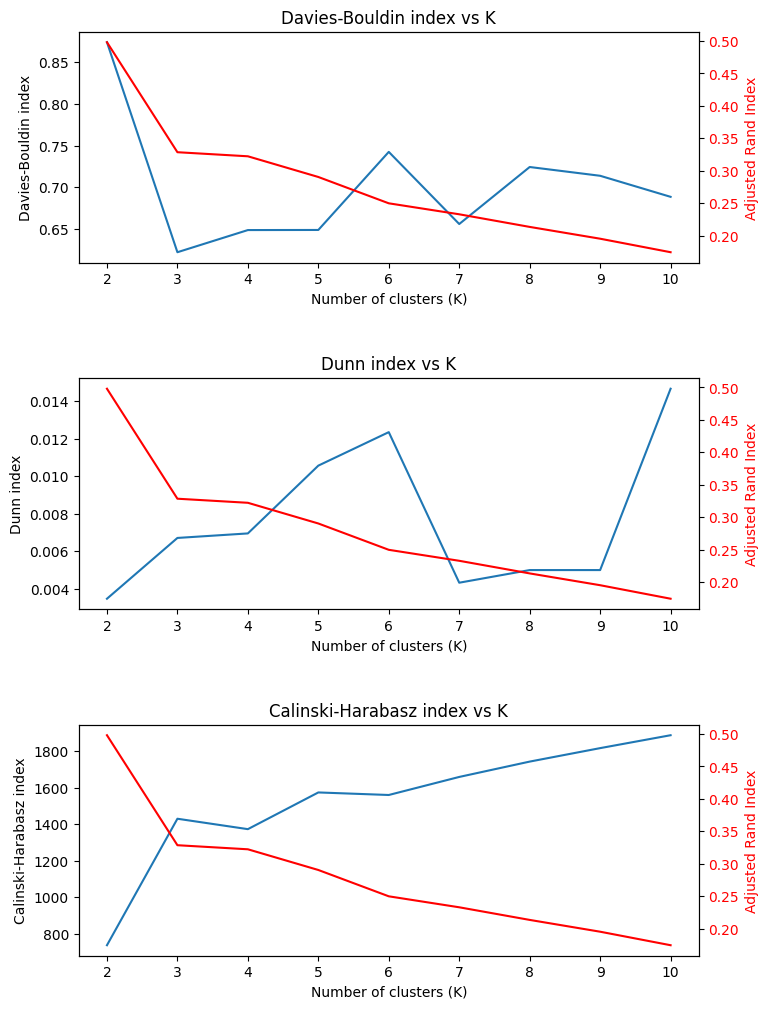

In [57]:
if __name__ == '__main__':
    
    # load the data from the CSV file
    data = pd.read_csv('twogaussians42.csv')
    
    # extract the feature vectors (x and y columns)
    feature_vectors = data.iloc[:, :2].values
    
    # extract the ground truth labels (if available)
    ground_truth = data.iloc[:, 2].values if data.shape[1] > 2 else None
    
    # evaluate clustering with different numbers of clusters
    internal_indices, external_indices = evaluate_clustering(feature_vectors, 10, ground_truth)
    
    plot_k_selection(internal_indices, external_indices)